In [145]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
 
data = pd.read_csv('JNJ5yr.csv')


data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by = 'Date')
data = data.reset_index(drop = True)
data = data.set_index('Date')


data = data.rename(columns={'Close/Last': 'Close'})
data['Close'] = data['Close'].str.replace('$','').astype(float)
data['Open'] = data['Open'].str.replace('$','').astype(float)
data['High'] = data['High'].str.replace('$','').astype(float)
data['Low'] = data['Low'].str.replace('$','').astype(float)
data

,Close,Volume,Open,High,Low
Date,,,,,
2018-04-10,130.25,6062936,130.25,130.9096,129.29
2018-04-11,129.63,4574560,129.14,130.3500,129.03
2018-04-12,130.43,4531503,130.09,131.3100,129.86
2018-04-13,130.62,4741975,131.09,131.4200,129.63
2018-04-16,131.76,6371955,131.41,132.8800,131.28
...,...,...,...,...,...
2023-03-31,155.00,9890047,153.79,155.1900,153.24
2023-04-03,156.85,6841888,154.95,157.0100,153.94
2023-04-04,158.49,8314527,156.97,158.9700,156.59


In [146]:

import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt

# Define range of moving averages to be calibrated, say 5 day moving average to 100 days
MA_range = range(5, 101, 2)

# Create a DataFrame to store the calibration results
calib = pd.DataFrame(MA_range)
calib.columns = ['MA_window']
calib['Mean'] = ''
calib['Stdev'] = ''
calib['SR'] = ''
calib['Ann_SR'] = ''


# Loop through each parameter value
for k in range(0, len(calib['MA_window'])):
    MA_window = calib['MA_window'][k]
    data['MA'] = data['Close'].rolling(window = MA_window).mean()
    data['Order'] = 0
    position = 0
    # Execute MA trade strategy
    for i in range(MA_window, len(data['Close'])):
        # If the price is above the moving average and we are not in a long position, enter a long position
        if data['Close'][i] > data['MA'][i] and position == 0:
            data['Order'][i] = 1
            position = 1
    # If the price is below the moving average and we are in a long position, exit the position
        elif data['Close'][i] < data['MA'][i] and position == 1:
            data['Order'][i] = -1
            position = 0
    # If the price is below the moving average and we are not in a short position, enter a short position
        elif data['Close'][i] < data['MA'][i] and position == 0:
            data['Order'][i] = -1
            position = -1
    # If the price is above the moving average and we are in a short position, exit the position
        elif data['Close'][i] > data['MA'][i] and position == -1:
            data['Order'][i] = 1
            position = 0
    
    # Calculate portfolio performance
    data['Pos_Count'] = data['Order'].cumsum()
    initial_capital = float(5000)
    portfolio = pd.DataFrame(index=data.index)
    portfolio['Position'] = data['Pos_Count'].multiply(data['Close'])
    portfolio['Cash'] = initial_capital - (data['Order'].multiply(data['Close'])).cumsum()
    portfolio['Total'] = portfolio['Position'] + portfolio['Cash']
    portfolio['PnL'] = portfolio['Total'] - initial_capital
    portfolio['daily PnL'] = portfolio['PnL'].diff()

    # Calculate calibration metrics
    calib['Mean'][k] = stat.mean(portfolio[2:]['daily PnL'])         
    calib['Stdev'][k] = stat.stdev(portfolio[2:]['daily PnL'])
    calib['SR'][k] = calib['Mean'][k] / calib['Stdev'][k]
    calib['Ann_SR'][k] = np.sqrt(252) * calib['SR'][k]
    
calib



,MA_window,Mean,Stdev,SR,Ann_SR
0,5,-0.058236,1.674178,-0.034785,-0.552192
1,7,-0.048849,1.733009,-0.028187,-0.447461
2,9,-0.066473,1.734297,-0.038328,-0.608445
3,11,-0.051043,1.727776,-0.029543,-0.468974
4,13,0.000669,1.747933,0.000383,0.006074
5,15,0.011377,1.786702,0.006368,0.101086
6,17,0.002269,1.79498,0.001264,0.020068
7,19,-0.013304,1.784351,-0.007456,-0.11836
8,21,0.002938,1.794646,0.001637,0.025987
9,23,0.014761,1.800933,0.008196,0.130114


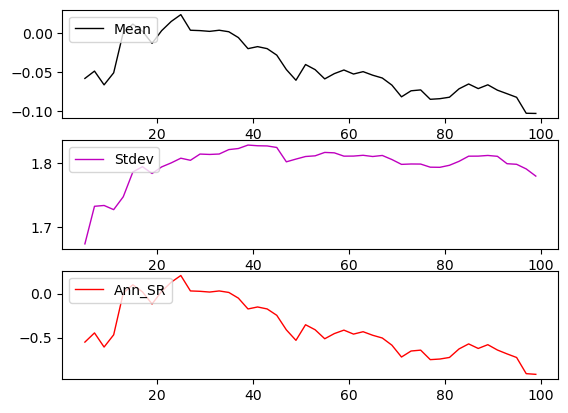

In [147]:
fig5, (ax1,ax2,ax3) = plt.subplots(3,1)
ax1.plot(calib['MA_window'],calib['Mean'], color='k', lw=1, label='Mean')
ax2.plot(calib['MA_window'],calib['Stdev'], color='m', lw=1, label='Stdev')
ax3.plot(calib['MA_window'],calib['Ann_SR'], color='r', lw=1, label='Ann_SR')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')
plt.show()

Above is the Annual SR chart for the MA trading strategy I implemented. Notice we reach our maximum SR of 0.206 at a MA window of 25 days. Hence, this is our calibrated value. We compare to this to BnH SR, which is 0.235. So our Trading SR is slightly smaller than our BnH SR. 

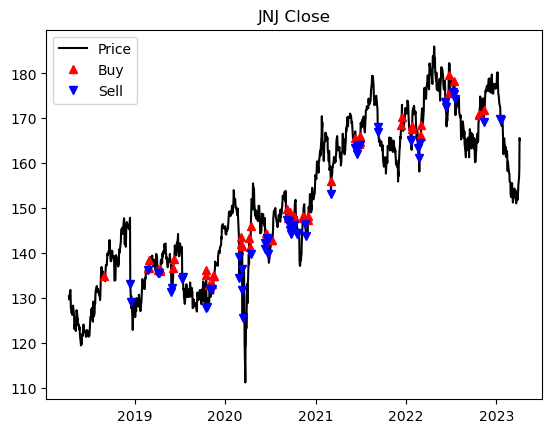

In [138]:
fig1, ax1 = plt.subplots()
ax1.plot(data['Close'], color='k', label='Price')
ax1.plot(data.loc[data.Order ==  1].index, data.Close[data.Order ==  1], '^', color='r', label='Buy')
ax1.plot(data.loc[data.Order == -1].index, data.Close[data.Order == -1], 'v', color='b', label='Sell')
plt.legend(loc='upper left')
plt.title('JNJ Close')
plt.show()

# Below is where our trading occurs for our strategy

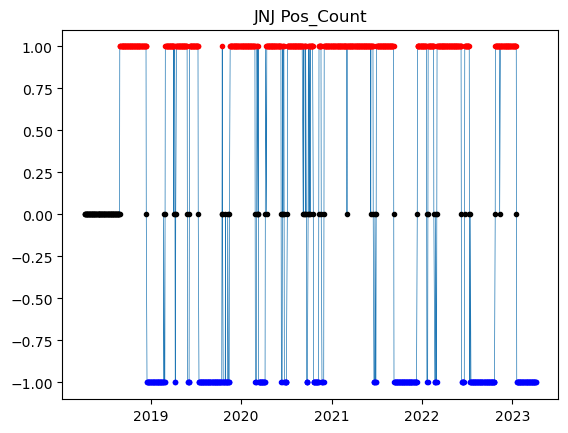

In [139]:
fig2, ax2 = plt.subplots()
ax2.plot(data.Pos_Count, lw=0.5)                                 
ax2.plot(data.loc[data.Pos_Count == 0].index, data.Pos_Count[data.Pos_Count == 0], '.', color='k')
ax2.plot(data.loc[data.Pos_Count >  0].index, data.Pos_Count[data.Pos_Count >  0], '.', color='r')
ax2.plot(data.loc[data.Pos_Count <  0].index, data.Pos_Count[data.Pos_Count <  0], '.', color='b')
plt.title('JNJ Pos_Count')
plt.show()

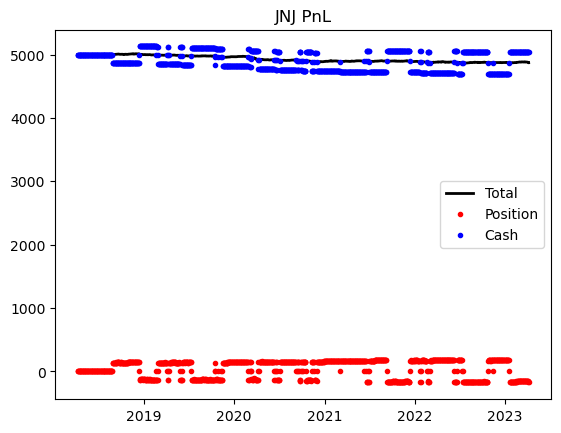

In [140]:
initial_capital = float(5000)
portfolio = pd.DataFrame(index=data.index)

portfolio['Position'] = data['Pos_Count'].multiply(data['Close'])
portfolio['Cash'] = initial_capital - (data['Order'].multiply(data['Close'])).cumsum()
portfolio['Total'] = portfolio['Position'] + portfolio['Cash']

fig3, ax3 = plt.subplots()
ax3.plot(portfolio['Total'], color='k', lw=2, label='Total')
ax3.plot(portfolio['Position'],'.', color='r', label='Position')
ax3.plot(portfolio['Cash'],'.', color='b', label='Cash')
plt.legend(loc='center right')
plt.title('JNJ PnL')
plt.show()

In [141]:
portfolio['PnL'] = portfolio['Total']-initial_capital
initial_price=data.iloc[0,0]                                              # iloc is index loc, = first Close
portfolio['BnH'] = data['Close']-initial_price
portfolio.head(30)

,Position,Cash,Total,PnL,BnH
Date,,,,,
2018-04-10,0.0,5000.0,5000.0,0.0,0.00
2018-04-11,0.0,5000.0,5000.0,0.0,-0.62
2018-04-12,0.0,5000.0,5000.0,0.0,0.18
2018-04-13,0.0,5000.0,5000.0,0.0,0.37
2018-04-16,0.0,5000.0,5000.0,0.0,1.51
2018-04-17,0.0,5000.0,5000.0,0.0,0.29
2018-04-18,0.0,5000.0,5000.0,0.0,-2.53
2018-04-19,0.0,5000.0,5000.0,0.0,-2.70
2018-04-20,0.0,5000.0,5000.0,0.0,-3.59


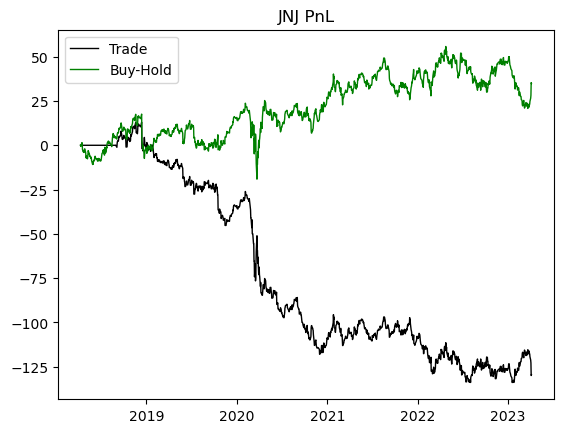

In [142]:
fig4, ax4 = plt.subplots()
ax4.plot(portfolio['PnL'], color='k', lw=1, label='Trade')
ax4.plot(portfolio['BnH'], color='g', lw=1, label='Buy-Hold')
plt.legend(loc='upper left')
plt.title('JNJ PnL')
plt.show()

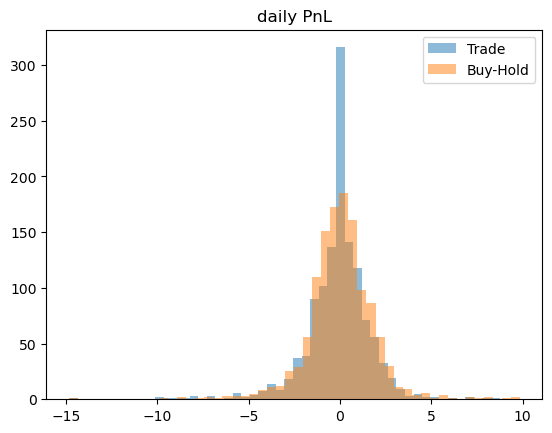

In [143]:
portfolio['daily PnL'] = portfolio['PnL'].diff()
portfolio['daily BnH'] = portfolio['BnH'].diff()

plt.hist(portfolio['daily PnL'], 50, alpha=0.5, label='Trade')           
plt.hist(portfolio['daily BnH'], 50, alpha=0.5, label='Buy-Hold')
plt.legend(loc='upper right')
plt.title('daily PnL')
plt.show()

In [144]:
m=stat.mean(portfolio[1:]['daily PnL'])          # exclude NaN first 1 rows
s=stat.stdev(portfolio[1:]['daily PnL'])         # exclude NaN first 1 rows
SR=m/s
AnnSR=np.sqrt(252)*SR
print('Trade:', m, s, SR, AnnSR)


m2=stat.mean(portfolio[1:]['daily BnH'])        
s2=stat.stdev(portfolio[1:]['daily BnH'])       
SR2=m2/s2
AnnSR2=np.sqrt(252)*SR2
print('Buy-Hold:', m2, s2, SR2, AnnSR2)

Trade: -0.10300715990453425 1.77954674855679 -0.057883930269363774 -0.9188789063984433
Buy-Hold: 0.02776451869530629 1.8740184252389247 0.014815499314936833 0.23518876041942402


(i) Trading Logic: Calculate the moving average. To calculate the moving average, we take the sum of the security's prices over a given time period (the window size) and divide it by the number of prices in the window. For example, a 20-day moving average is calculated by taking the sum of the security's prices over the last 20 days and dividing it by 20. The moving average line is plotted on the chart along with the security's price.

Identify the trend: The direction of the trend is determined by the slope of the moving average line. If the moving average line is sloping upward, the trend is considered bullish, and if it's sloping downward, the trend is considered bearish.

Generate the trading signals: When the security's price crosses above the moving average line from below, it's considered a bullish signal, and a long position is opened. Conversely, when the security's price crosses below the moving average line from above, it's considered a bearish signal, and a short position is opened.

Manage the position: Once a position is opened, we need to manage it by setting a stop-loss order and taking profits when the price reaches a certain level. The stop-loss order is placed below the entry price for a long position and above the entry price for a short position. The take-profit order is placed at a predetermined level based on the risk-reward ratio.

Exit the position: If the stop-loss or take-profit order is triggered, the position is closed. Alternatively, we can exit the position if the security's price crosses below the moving average line for a long position or above the moving average line for a short position. This exit strategy is used to capture most of the trend's movements and avoid false signals.

Repeat the process: This strategy is repeated over time, with the moving average line and the entry and exit levels recalculated on a regular basis to reflect the most recent market data. This is the calibration part since the MA length is being varied to find the best SR. 

(ii) Firstly, we would choose a MA window of 25 since this produces the highest value of the Sharpe Ratio. Unfortunately, I could not find data that yielded a higher SR than our BnH strategy. The annualized Sharpe ratio will vary with each differing MA window size because each MA window size will produce a different set of trading signals, which will result in different portfolios with different risk-return characteristics, and consequently different Sharpe ratios. The graph of the annualized Sharpe ratio as a function of the MA window size can be used to determine the MA window size that maximizes the risk-adjusted return of the trading strategy. We did this at the beginning and determined an optimal MA window size of 25. 

(iii) The performance of our calibrated trading strategy (MA) was extremely poor, and lost tons more money than BnH. The performance of a moving average strategy is highly dependent on the market conditions during the time period being evaluated. If the market experiences long periods of trending behavior, then a moving average strategy can perform well. However, if the market experiences a lot of volatility or choppy trading, then a moving average strategy can result in many false signals, leading to poor performance. For the case of Johnson & Johnson, its 5-year historical data looks very volatile at first glance. This could be a reason why our MA strategy did so poorly compared to the BnH. Secondly, a shorter MA window size will produce more trading signals, but also more false signals, while a longer MA window size will produce fewer signals, but with more significant lag. If the MA window size is not optimized for the specific market conditions being evaluated, then the strategy may not perform well. The window size of 25 we chose for the 5-year data is relatively short, so there were probably tons of false signals which lead to poor performance. 